In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4 

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

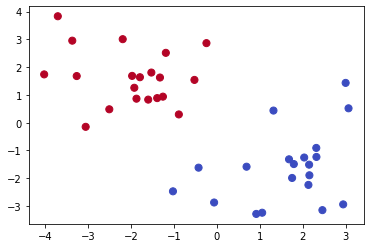

In [2]:
# Data
data1=pd.read_csv('D:/Shantanu/NYU CUSP/Machine learning for cities/HW assignments/Assignment 2/Assignment 2 attached files Oct 4, 2022 934 PM/HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

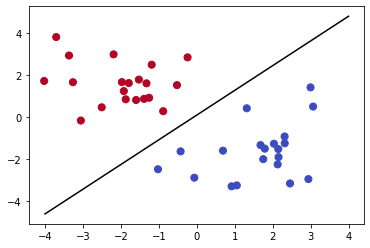

In [3]:
from sklearn import svm

clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-4, 4)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

b_d = clf.support_vectors_[0]
x2_down = a * x1 + (b_d[1] - a * b_d[0])


b_u = clf.support_vectors_[-1]
x2_up = a * x1 + (b_u[1] - a * b_u[0])


plt.gca()
plt.plot(x1, x2, 'k-')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()


#### b. List the support vectors.

[[-0.42627536 -1.61810965]
 [ 1.3180363   0.43600617]
 [-0.88564585  0.2969359 ]]


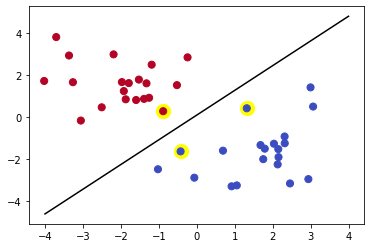

In [4]:
print(clf.support_vectors_)

plt.gca()
plt.plot(x1, x2, 'k-')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='yellow')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.axis('tight')
plt.show()



#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

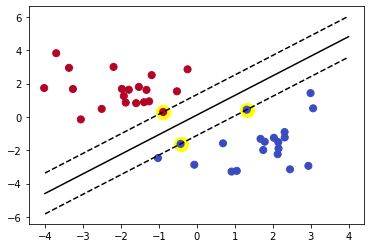

x2_down:y =  1.1774373623419114 x + -1.116197106957939
x2_up: y = 1.1774373623419114 x + 1.3397284161253722


In [5]:
x2_down = a * x1 + (b_d[1] - a * b_d[0])
x2_up = a * x1 + (b_u[1] - a * b_u[0])
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='yellow')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.axis('tight')
plt.show()

print("x2_down:y = ",a,"x +", (b_d[1] - a * b_d[0]))
print("x2_up: y =",a,"x +", (b_u[1] - a * b_u[0]))

## lines y = mx +c


#### d. Compute the width of the margin.

In [6]:
abs((b_d[1] - a * b_d[0]) - (b_u[1] - a * b_u[0]))/ np.sqrt((a * a) + 1)
## used formula to calculate distance between 2 parallel lines

1.5898176953798933

#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following questions:

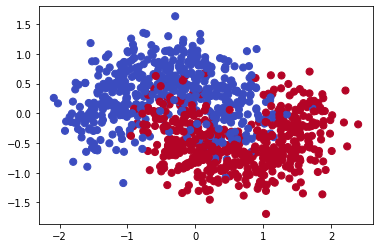

In [7]:
# Data 
data2=pd.read_csv('D:/Shantanu/NYU CUSP/Machine learning for cities/HW assignments/Assignment 2/Assignment 2 attached files Oct 4, 2022 934 PM/HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

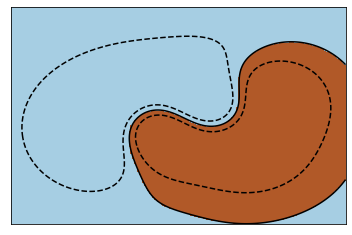

In sample, we successfully predict 90.4 percent of the data


In [27]:
clf = svm.SVC() 
clf.fit(X, Y)
plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
            facecolors='none', zorder=10)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

plt.axis('tight')
x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading = 'auto')
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

print("In sample, we successfully predict {} percent of the data".format((Y==clf.predict(X)).sum()*100/len(Y)))




In [26]:
from sklearn.model_selection import train_test_split
OS = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=i)

    clf = svm.SVC()
    clf.fit(X_train, Y_train)

    correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)
    OS.append(correct)
    
print("Out of sample, we successfully predict {} percent of the data".format((np.mean(correct))*100))


Out of sample, we successfully predict 91.81818181818183 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


            0         1
0    0.000045  0.504505
1    0.000048  0.504505
2    0.000051  0.504505
3    0.000054  0.504505
4    0.000058  0.504505
..        ...       ...
195  5.805432  0.851351
196  6.166278  0.851351
197  6.549554  0.851351
198  6.956653  0.851351
199  7.389056  0.851351

[200 rows x 2 columns]


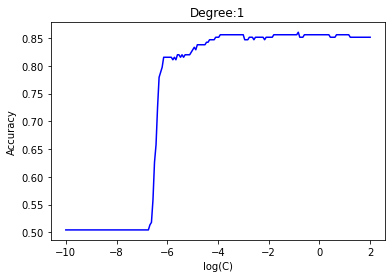

             0         1
0     0.000045  0.504505
1     0.000049  0.504505
2     0.000052  0.504505
3     0.000056  0.504505
4     0.000060  0.504505
..         ...       ...
195  41.206374  0.558559
196  44.209722  0.558559
197  47.431970  0.558559
198  50.889074  0.558559
199  54.598150  0.558559

[200 rows x 2 columns]


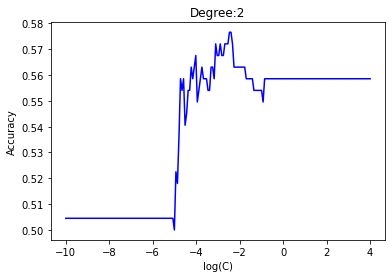

              0         1
0      0.000045  0.504505
1      0.000049  0.504505
2      0.000053  0.504505
3      0.000058  0.504505
4      0.000063  0.504505
..          ...       ...
195  292.478734  0.864865
196  316.965828  0.864865
197  343.503046  0.864865
198  372.262031  0.864865
199  403.428793  0.864865

[200 rows x 2 columns]


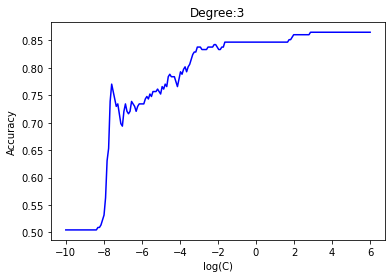

               0         1
0       0.000045  0.504505
1       0.000050  0.504505
2       0.000054  0.504505
3       0.000060  0.504505
4       0.000065  0.504505
..           ...       ...
195  2075.984867  0.558559
196  2272.516794  0.558559
197  2487.654251  0.558559
198  2723.158609  0.558559
199  2980.957987  0.558559

[200 rows x 2 columns]


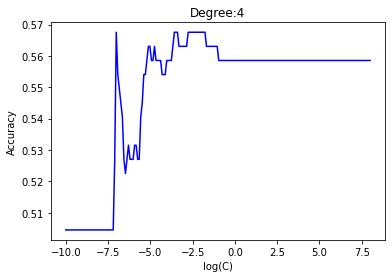

In [10]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).


import math

for i in range (1,5):

    OS_validation=[]
    X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

    C = [math.exp(i) for i in np.linspace(-10,2*i,200)] 

    for c in C:
        clf = svm.SVC(kernel='poly',degree = i,C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    
    temp=pd.DataFrame([C,OS_validation]).T # put results together.
    print(temp)

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title('Degree:' + str(i))
    plt.show()

# your code here

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [11]:
clf = svm.SVC(kernel='poly', degree =3, C = 300)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, the polynomial kernel successfully predicts {} percent of the data".format((correct)*100))

Out of sample, the polynomial kernel successfully predicts 87.57575757575758 percent of the data


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

SUV,red,imported,yes

sports,yellow,domestic,no

sports,red,imported,no

SUV,red,domestic,yes

SUV,red,imported,yes

sports,yellow,domestic,no

SUV,red,imported,yes

SUV,yellow,domestic,yes

sports,yellow,imported,no

sports,red,imported,yes


### Questions:

a) Calculate the following sample probabilities:

P(Yes)

P(No)

P(Red|Yes)

P(SUV|Yes)

P(Domestic|Yes)

P(Red|No)

P(SUV|No)

P(Domestic|No)

b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

Probability of YES
7/11 = 0.63

Probability of NO
4/11 = 0.36

P(red|yes)
6/7 = 0.85

P(SUV|yes)
5/7 = 0.71

P(Dom|Yes)
3/7 = 0.42

P(red|no)
1/4 = 0.25

P(SUV|No)
0

P(Dom|no)
2/4 = 0.5

x = P(Yes/Red,Domestic,SUV)
(P(x/yes).P(yes))/ P(x/yes).P(yes)+P(x/no).P(no)

P(Yes)=7/11, P(no)= 4/11

P(x/yes) = P(Red/no).P(Dom/yes).P(Suv/yes)
= (6/7).(3/7).(5/7)
= 90/343= 0.262

P(x/no) = P(red/no).P(Dom/no).P(Suv/no)
= (1/4).(2/4).(0)
=0

P(Yes/Red,Domestic,SUV) = (0.262x0.63)/0.262x0.63 + 0
= 1




## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if the monthly rent of an apartment in Brazil is lower than $600 or not. The variables are:

y: The label (1 - rent is lower than 600 USD, 0 - rent is higher or equal to 600 USD)

city: Apartment location (1 - city, 0 - otherwise)

area: Code number for each area

rooms: Number of rooms

bathroom: Number of bathrooms

parking_spaces: Number of parking spaces

floor: Apartment floor

animal: 1 - if animals are allowed, 0 - if animals are not allowed 

furniture: 1 - if apartment is furnished, 0 - if apartment is unfurnished 

Original dataset "brazilian_houses_to_rent" available in: https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent.

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [12]:
# Training data
data_train=pd.read_csv("D:/Shantanu/NYU CUSP/Machine learning for cities/HW assignments/Assignment 2/Assignment 2 attached files Oct 4, 2022 934 PM/HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("D:/Shantanu/NYU CUSP/Machine learning for cities/HW assignments/Assignment 2/Assignment 2 attached files Oct 4, 2022 934 PM/HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   city  area  rooms  bathroom  parking_spaces  floor  animal  furniture
0     1   240      3         3               4      0       1          1
1     0    64      2         1               1     10       1          0
2     1   443      5         5               4      3       1          1
3     1    73      2         2               1     12       1          0
4     1    19      1         1               0      0       0          0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))


In sample prediction accuracy: 0.8137254901960784
Out of sample prediction accuracy: 0.7996070726915521


### b) What is the prior probability of "rent lower than 600 USD", learned from the training data?

In [14]:
prior_rent_600l = y_train.sum()/y_train.count()
prior_rent_600l


0.5049019607843137

### c) What is the mean and variance of of each input for apartments with rent lower than 600 USD?

In [15]:


def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
 
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_var1'] = np.var(X_1[j])
       
    return nbc

trainGaussianNaiveBayes(X_train, y_train)

{'prior': 0.5049019607843137,
 'city_mu1': 0.6990291262135923,
 'city_var1': 0.21038740691865357,
 'area_mu1': 70.54368932038835,
 'area_var1': 2208.461683476293,
 'rooms_mu1': 1.8737864077669903,
 'rooms_var1': 0.9840701291356386,
 'bathroom_mu1': 1.5145631067961165,
 'bathroom_var1': 0.5993024790272419,
 'parking_spaces_mu1': 1.029126213592233,
 'parking_spaces_var1': 1.5234235083419752,
 'floor_mu1': 5.29126213592233,
 'floor_var1': 34.18701102837211,
 'animal_mu1': 0.7475728155339806,
 'animal_var1': 0.1887077010085777,
 'furniture_mu1': 0.1650485436893204,
 'furniture_var1': 0.137807521915355}

### d) What is the mean and variance of each input variable for apartments with rent higher than 600 USD?

In [16]:
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_0 = X[y==0]
 
    for j in X.columns:
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_var0'] = np.var(X_0[j])
       
    return nbc

trainGaussianNaiveBayes(X_train, y_train)

{'prior': 0.5049019607843137,
 'city_mu0': 0.9603960396039604,
 'city_var0': 0.03803548671698846,
 'area_mu0': 212.5148514851485,
 'area_var0': 21853.893343789834,
 'rooms_mu0': 2.9405940594059405,
 'rooms_var0': 1.2043917263013433,
 'bathroom_mu0': 3.099009900990099,
 'bathroom_var0': 1.9109891187138512,
 'parking_spaces_mu0': 2.4653465346534653,
 'parking_spaces_var0': 2.050779335359279,
 'floor_mu0': 4.732673267326732,
 'floor_var0': 26.35427899225564,
 'animal_mu0': 0.801980198019802,
 'animal_var0': 0.15880796000392128,
 'furniture_mu0': 0.39603960396039606,
 'furniture_var0': 0.23919223605528903}

## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [17]:
data_train=pd.read_csv("D:/Shantanu/NYU CUSP/Machine learning for cities/HW assignments/Assignment 2/Assignment 2 attached files Oct 4, 2022 934 PM/HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("D:/Shantanu/NYU CUSP/Machine learning for cities/HW assignments/Assignment 2/Assignment 2 attached files Oct 4, 2022 934 PM/HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("D:/Shantanu/NYU CUSP/Machine learning for cities/HW assignments/Assignment 2/Assignment 2 attached files Oct 4, 2022 934 PM/HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  2  1  3
1  2  1  4
2  2  5  5
3  5  4  5
4  4  4  6
5  3  5  1
6  3  4  4
7  1  1  2
8  1  4  1
0    0
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    0
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [18]:
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
       
        y_pred[i] = nbc['prior']/(1-nbc['prior']) 
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
      
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [19]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)

y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)



print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Out of sample prediction accuracy: 0.7222222222222222


### b) Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer). 

In [20]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [21]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=100)
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)


# check if labels switched
if (1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test) < 0.5):
    y_pred_test = 1.0-y_pred_test

print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 100
Iteration 2 of 100
Iteration 3 of 100
Iteration 4 of 100
Iteration 5 of 100
Iteration 6 of 100
Iteration 7 of 100
Iteration 8 of 100
Iteration 9 of 100
Iteration 10 of 100
Iteration 11 of 100
Iteration 12 of 100
Iteration 13 of 100
Iteration 14 of 100
Iteration 15 of 100
Iteration 16 of 100
Iteration 17 of 100
Iteration 18 of 100
Iteration 19 of 100
Iteration 20 of 100
Iteration 21 of 100
Iteration 22 of 100
Iteration 23 of 100
Iteration 24 of 100
Iteration 25 of 100
Iteration 26 of 100
Iteration 27 of 100
Iteration 28 of 100
Iteration 29 of 100
Iteration 30 of 100
Iteration 31 of 100
Iteration 32 of 100
Iteration 33 of 100
Iteration 34 of 100
Iteration 35 of 100
Iteration 36 of 100
Iteration 37 of 100
Iteration 38 of 100
Iteration 39 of 100
Iteration 40 of 100
Iteration 41 of 100
Iteration 42 of 100
Iteration 43 of 100
Iteration 44 of 100
Iteration 45 of 100
Iteration 46 of 100
Iteration 47 of 100
Iteration 48 of 100
Iteration 49 of 100
Iteration 50 of 100
Iteration

In [22]:
## the out of sample accuracy is not improved for the classification of unlabed data


In [23]:
X_train_Unlabeled=X_Unlabeled_train # assume all observations are unlabeled
X_train_Labeled=X_Labeled_train.iloc[[],:] # empty
y_train_Labeled=y_Labeled_train.iloc[[]] # empty

In [24]:
naive_bayes_classifier=EM(X_train_Labeled,y_train_Labeled,X_train_Unlabeled,num_iters=100)
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# check if labels switched
if (1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test) < 0.5):
    y_pred_test = 1.0-y_pred_test

print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 100
Iteration 2 of 100
Iteration 3 of 100
Iteration 4 of 100
Iteration 5 of 100
Iteration 6 of 100
Iteration 7 of 100
Iteration 8 of 100
Iteration 9 of 100
Iteration 10 of 100
Iteration 11 of 100
Iteration 12 of 100
Iteration 13 of 100
Iteration 14 of 100
Iteration 15 of 100
Iteration 16 of 100
Iteration 17 of 100
Iteration 18 of 100
Iteration 19 of 100
Iteration 20 of 100
Iteration 21 of 100
Iteration 22 of 100
Iteration 23 of 100
Iteration 24 of 100
Iteration 25 of 100
Iteration 26 of 100
Iteration 27 of 100
Iteration 28 of 100
Iteration 29 of 100
Iteration 30 of 100
Iteration 31 of 100
Iteration 32 of 100
Iteration 33 of 100
Iteration 34 of 100
Iteration 35 of 100
Iteration 36 of 100
Iteration 37 of 100
Iteration 38 of 100
Iteration 39 of 100
Iteration 40 of 100
Iteration 41 of 100
Iteration 42 of 100
Iteration 43 of 100
Iteration 44 of 100
Iteration 45 of 100
Iteration 46 of 100
Iteration 47 of 100
Iteration 48 of 100
Iteration 49 of 100
Iteration 50 of 100
Iteration